In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Define the new groups: key=new label, value=(original label A, original label B)
pair_groups = {
    0: (0, 1),
    1: (2, 3),
    2: (4, 5),
    3: (6, 7),
    4: (8, 9)
}

2025-02-19 21:35:42.837518: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 21:35:42.849911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740022542.861906  223370 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740022542.865530  223370 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 21:35:42.879049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def create_mixed_dataset(images, labels, pair_groups, random_seed=42):
    np.random.seed(random_seed)
    mixed_images = []
    mixed_labels = []
    
    # For each new label group
    for new_label, (label_a, label_b) in pair_groups.items():
        # Get all indices for each original label
        indices_a = np.where(labels == label_a)[0]
        indices_b = np.where(labels == label_b)[0]
        
        # Shuffle the indices to randomize pairing
        np.random.shuffle(indices_a)
        np.random.shuffle(indices_b)
        
        # Use the minimum number of available images to form pairs
        num_pairs = min(len(indices_a), len(indices_b))
        
        for i in range(num_pairs):
            # Convert images to float for averaging
            img_a = images[indices_a[i]].astype(np.float32)
            img_b = images[indices_b[i]].astype(np.float32)
            
            # Compute pixel-wise average to create a mixed image
            mixed_img = (img_a + img_b) / 2.0
            
            mixed_images.append(mixed_img)
            mixed_labels.append(new_label)
    
    return np.array(mixed_images), np.array(mixed_labels)

In [3]:
# Create the new mixed training dataset
new_train_images, new_train_labels = create_mixed_dataset(train_images, train_labels, pair_groups)

# Create the new mixed test dataset
new_test_images, new_test_labels = create_mixed_dataset(test_images, test_labels, pair_groups)

# Print the shapes of the new datasets
print("New training dataset shape:", new_train_images.shape, new_train_labels.shape)
print("New test dataset shape:", new_test_images.shape, new_test_labels.shape)

New training dataset shape: (29071, 28, 28) (29071,)
New test dataset shape: (4814, 28, 28) (4814,)


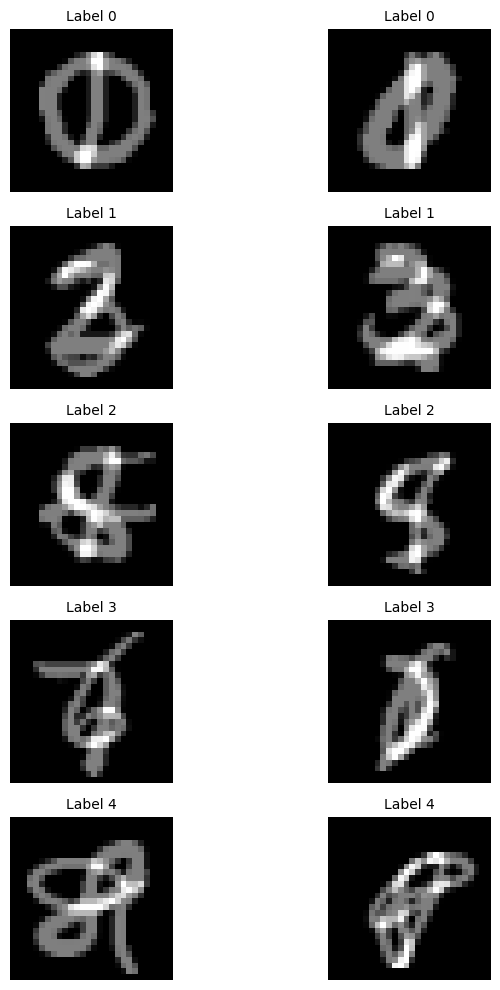

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming new_train_images and new_train_labels have been created as in the previous code.

# Get the unique new labels (0, 1, 2, 3, 4)
unique_labels = np.unique(new_train_labels)

# Create a subplot: 5 rows (one per label) and 2 columns (2 images per label)
fig, axes = plt.subplots(nrows=len(unique_labels), ncols=2, figsize=(8, len(unique_labels)*2))

# Loop through each label and display 2 random images
for i, label in enumerate(unique_labels):
    # Find indices of images with the current label
    label_indices = np.where(new_train_labels == label)[0]
    # Randomly select 2 indices for the current label
    selected_indices = np.random.choice(label_indices, size=2, replace=False)
    
    for j, idx in enumerate(selected_indices):
        axes[i, j].imshow(new_train_images[idx], cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Label {label}', fontsize=10)

plt.tight_layout()
plt.show()


I0000 00:00:1740022545.346452  223370 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:21:00.0, compute capability: 8.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,997 (1.61 MB)

 Trainable params: 420,997 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35


I0000 00:00:1740022546.481564  223776 service.cc:148] XLA service 0x14561401c770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740022546.481602  223776 service.cc:156]   StreamExecutor device (0): NVIDIA A30, Compute Capability 8.0
2025-02-19 21:35:46.500754: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740022546.602344  223776 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-19 21:35:46.691831: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2025-02-19 21:35:46.918960: I e

 88/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7499 - loss: 0.7420 

I0000 00:00:1740022548.056069  223776 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8362 - loss: 0.5197 - val_accuracy: 0.0015 - val_loss: 2.9170
Epoch 2/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0965 - val_accuracy: 0.0506 - val_loss: 2.6094
Epoch 3/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0641 - val_accuracy: 0.0612 - val_loss: 2.8607
Epoch 4/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.0526 - val_accuracy: 0.1986 - val_loss: 2.3658
Epoch 5/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0418 - val_accuracy: 0.3319 - val_loss: 1.7548
Epoch 6/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0368 - val_accuracy: 0.3417 - val_loss: 1.7922
Epoch 7/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0387 - val_accuracy: 0.5209 - val_loss: 1.3255
Epoch 8/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0307 - val_accuracy: 0.3943 - val

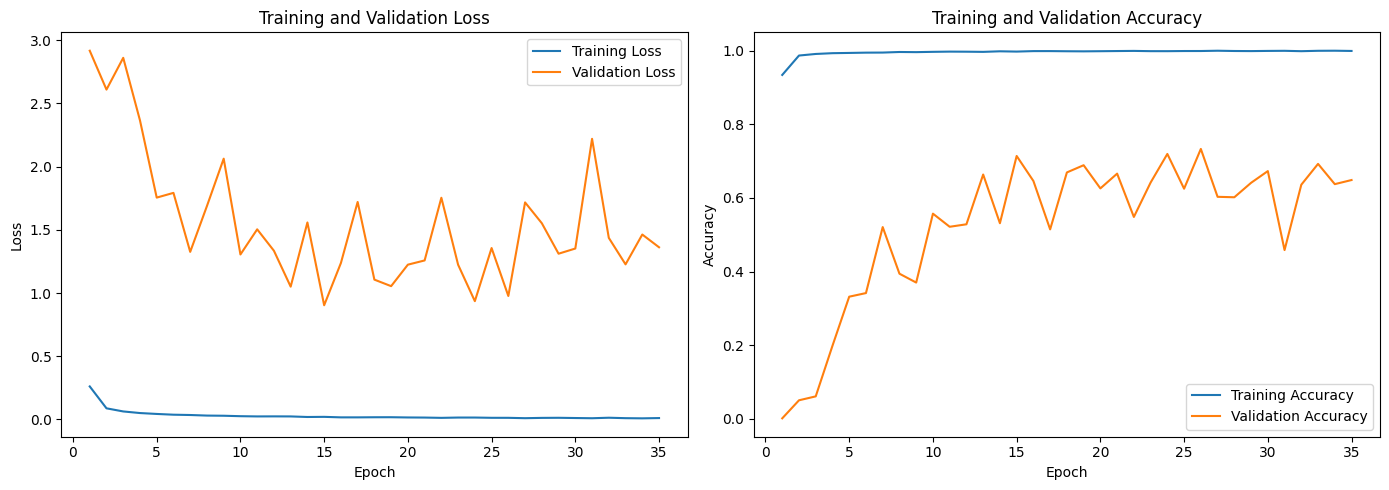

Final Training Loss: 0.0105
Final Training Accuracy: 0.9992
Final Validation Loss: 1.3618
Final Validation Accuracy: 0.6487
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0442    
Test Loss: 0.2758
Test Accuracy: 0.9317


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# --- Data Preparation ---
# Assume new_train_images, new_train_labels, new_test_images, and new_test_labels are already created.
# Normalize the images to the [0, 1] range.
new_train_images = new_train_images.astype('float32') / 255.0
new_test_images = new_test_images.astype('float32') / 255.0

# Expand dims to include the channel dimension (if needed)
new_train_images = np.expand_dims(new_train_images, -1)  # shape: (num_train, 28, 28, 1)
new_test_images = np.expand_dims(new_test_images, -1)      # shape: (num_test, 28, 28, 1)

# --- Model Definition ---
def create_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        # First Conv2D layer with L2 regularization
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(1e-4)
                     ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Second Conv2D layer with L1 regularization
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l1(1e-4)
                     ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(5, activation='softmax')  # 5 output classes
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# --- Model Training ---
# Train the model using a validation split (e.g., 20% of the training data)
history = model.fit(new_train_images, new_train_labels,
                    epochs=35,
                    batch_size=128,
                    validation_split=0.2)

# --- Plotting Training/Validation Loss and Accuracy ---
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --- Display Final Metrics ---
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# --- Test Set Evaluation ---
test_loss, test_acc = model.evaluate(new_test_images, new_test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


During Training I noticed lots of overfitting. L1, L2 regularization + dropout greatly helped with this. I did not observe underfitting, training loss typically went straight to 0.